In [1]:
import numpy as np  # Import numpy library for numerical operations
import pandas as pd  # Import pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib library for data visualization
import seaborn as sns  # Import seaborn library for statistical data visualization
from sklearn.model_selection import train_test_split, GridSearchCV  # Import necessary functions for model evaluation and tuning
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression classifier
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes classifier
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree classifier
from sklearn.neural_network import MLPClassifier  # Import Multi-layer Perceptron classifier
from sklearn.svm import SVC  # Import Support Vector Machine classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Import evaluation metrics
from sklearn.model_selection import learning_curve  # Import learning_curve function for plotting learning curves


# Load dataset

In [2]:
data = pd.read_csv("online_return_dataset.csv")  # Read the dataset into a DataFrame

In [3]:
print(data.head)  # Print the first few rows of the DataFrame

<bound method NDFrame.head of      Age  Purchase Frequency  Product Quality  Shipping Speed  \
0     56                   3                3               4   
1     69                   3                3               1   
2     46                   1                2               3   
3     32                   5                1               5   
4     60                   4                2               3   
..   ...                 ...              ...             ...   
995   60                   4                5               4   
996   64                   2                4               4   
997   62                   4                1               4   
998   35                   5                1               2   
999   55                   2                1               3   

     Customer Reviews  Return Online  
0                   1              0  
1                   5              1  
2                   3              0  
3                   2            

# Split data into features and target variable

In [4]:
X = data.drop('Return Online', axis=1)  # Separate features (independent variables)
y = data['Return Online']  # Separate target variable (dependent variable)

In [5]:
print(X)  # Print the features DataFrame
print("-"*50)  # Print a separator line
print(y)  # Print the target variable Series

     Age  Purchase Frequency  Product Quality  Shipping Speed  \
0     56                   3                3               4   
1     69                   3                3               1   
2     46                   1                2               3   
3     32                   5                1               5   
4     60                   4                2               3   
..   ...                 ...              ...             ...   
995   60                   4                5               4   
996   64                   2                4               4   
997   62                   4                1               4   
998   35                   5                1               2   
999   55                   2                1               3   

     Customer Reviews  
0                   1  
1                   5  
2                   3  
3                   2  
4                   3  
..                ...  
995                 5  
996                 1  
997

# Split dataset into train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into training and testing sets

# Standardize features

In [7]:
scaler = StandardScaler()  # Initialize StandardScaler for feature scaling
X_train_scaled = scaler.fit_transform(X_train)  # Scale the training features
X_test_scaled = scaler.transform(X_test)  # Scale the testing features


# Initialize classifiers

In [8]:
classifiers = {  # Dictionary containing different classifiers for model evaluation
    'Logistic Regression': LogisticRegression(),  # Logistic Regression classifier
    'Naïve Bayes': GaussianNB(),  # Gaussian Naive Bayes classifier
    'Decision Trees': DecisionTreeClassifier(),  # Decision Tree classifier
    'Neural Network': MLPClassifier(max_iter=1000),  # Multi-layer Perceptron classifier with increased max_iter
    'SVM': SVC()  # Support Vector Machine classifier
}

# Train classifiers

In [9]:
for name, clf in classifiers.items():  # Iterate over classifiers
    clf.fit(X_train_scaled, y_train)  # Train each classifier on the scaled training data


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Evaluate performance before hyperparameter tuning

In [10]:
results_before_tuning = {}  # Dictionary to store evaluation results before hyperparameter tuning

for name, clf in classifiers.items():  # Iterate over classifiers
    y_pred = clf.predict(X_test_scaled)  # Predict the target variable using the trained classifier
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    report = classification_report(y_test, y_pred)  # Generate classification report
    confusion = confusion_matrix(y_test, y_pred)  # Generate confusion matrix
    results_before_tuning[name] = {'Accuracy': accuracy, 'Report': report, 'Confusion Matrix': confusion}  # Store results


# Hyperparameter tuning (grid search for example)

In [11]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  # Define the grid of hyperparameters for SVM
svm_clf = classifiers['SVM']  # Select SVM classifier
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)  # Perform grid search with cross-validation
grid_search.fit(X_train_scaled, y_train)  # Fit the grid search to find the best hyperparameters
best_params = grid_search.best_params_  # Get the best hyperparameters found by grid search

# Update SVM classifier with best parameters

In [12]:
svm_clf_best = SVC(**best_params)  # Create a new SVM classifier with the best hyperparameters
classifiers['SVM'] = svm_clf_best  # Update the SVM classifier with the best model
svm_clf_best.fit(X_train_scaled, y_train)  # Train the SVM classifier with the best model on the scaled training data

SVC(C=0.1)

# Evaluate performance after hyperparameter tuning

In [13]:
results_after_tuning = {}  # Dictionary to store evaluation results after hyperparameter tuning

for name, clf in classifiers.items():  # Iterate over classifiers
    y_pred = clf.predict(X_test_scaled)  # Predict the target variable using the trained classifier
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    report = classification_report(y_test, y_pred)  # Generate classification report
    confusion = confusion_matrix(y_test, y_pred)  # Generate confusion matrix
    results_after_tuning[name] = {'Accuracy': accuracy, 'Report': report, 'Confusion Matrix': confusion}  # Store results

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Visualizations

### Confusion Matrix

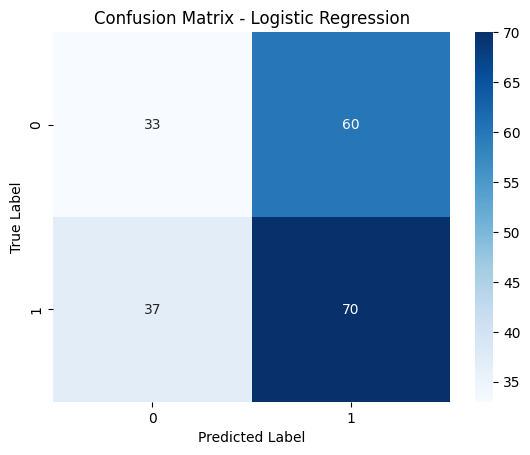

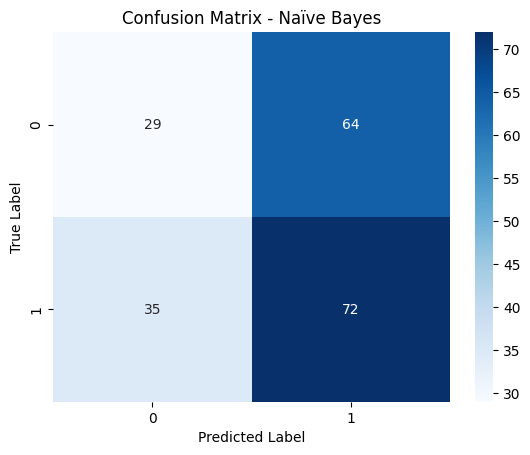

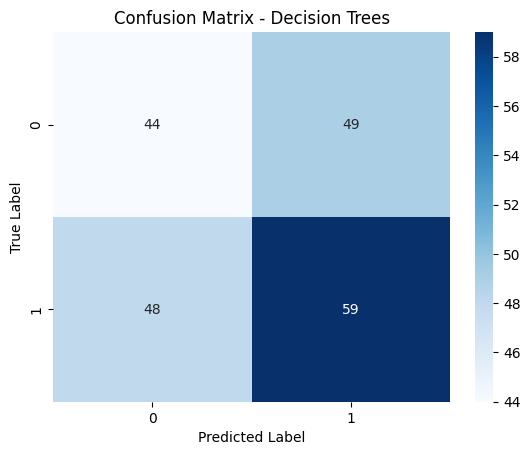

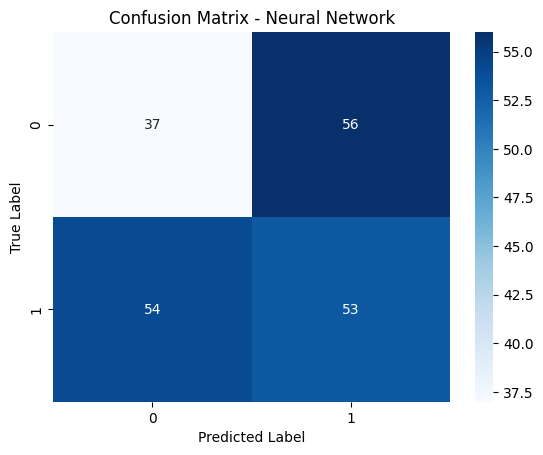

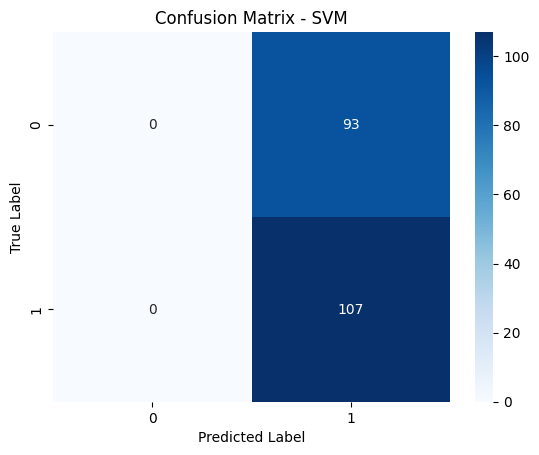

In [14]:
for name, result in results_after_tuning.items():  # Iterate over classifiers and their evaluation results
    plt.figure()  # Create a new figure
    sns.heatmap(result['Confusion Matrix'], annot=True, cmap='Blues', fmt='d')  # Plot confusion matrix heatmap
    plt.title(f'Confusion Matrix - {name}')  # Set the title of the plot
    plt.xlabel('Predicted Label')  # Set the label for x-axis
    plt.ylabel('True Label')  # Set the label for y-axis
    plt.show()  # Display the plot

### Plot learning curves

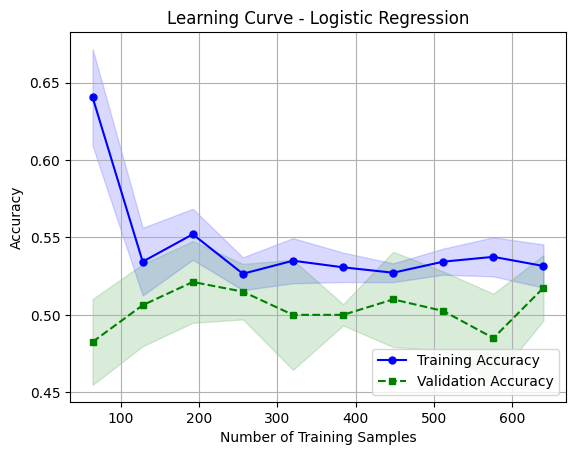

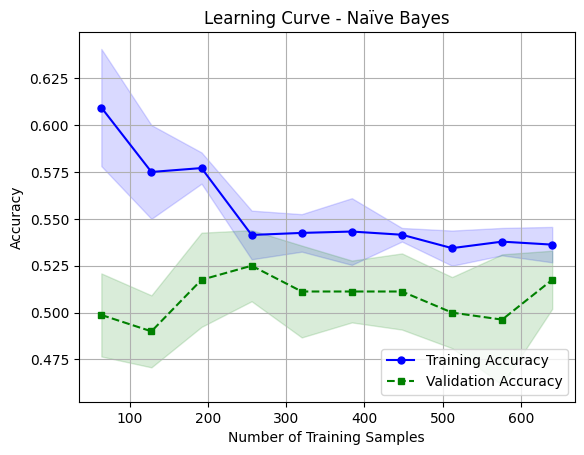

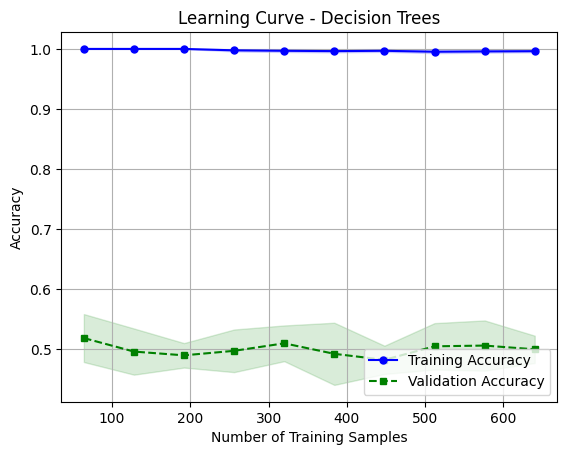

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

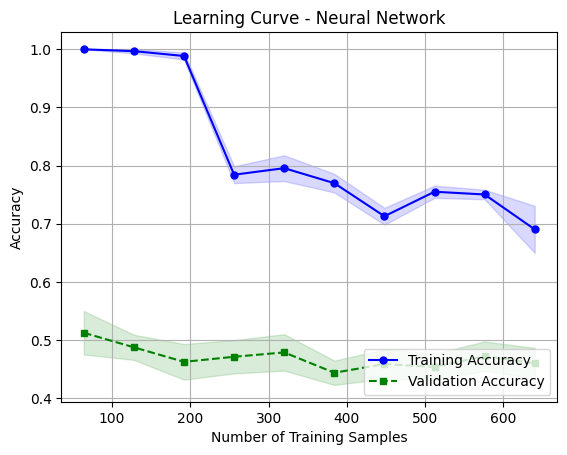

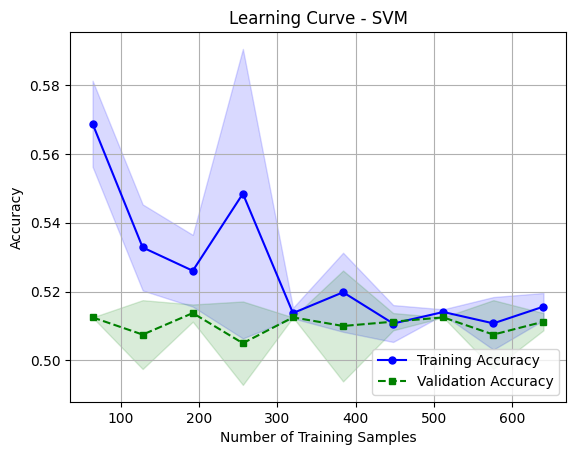

In [15]:
for name, clf in classifiers.items():  # Iterate over classifiers
    train_sizes, train_scores, test_scores = learning_curve(  # Generate learning curves
        clf, X_train_scaled, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )  # Use 5-fold cross-validation, vary training sizes from 10% to 100% of the data, and use accuracy as the scoring metric
    train_mean = np.mean(train_scores, axis=1)  # Calculate mean training scores
    train_std = np.std(train_scores, axis=1)  # Calculate standard deviation of training scores
    test_mean = np.mean(test_scores, axis=1)  # Calculate mean test scores
    test_std = np.std(test_scores, axis=1)  # Calculate standard deviation of test scores

    plt.figure()  # Create a new figure
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')  # Plot training accuracy
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')  # Plot variance of training accuracy
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')  # Plot validation accuracy
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')  # Plot variance of validation accuracy
    plt.title(f'Learning Curve - {name}')  # Set the title of the plot
    plt.xlabel('Number of Training Samples')  # Set the label for x-axis
    plt.ylabel('Accuracy')  # Set the label for y-axis
    plt.legend(loc='lower right')  # Add legend to the plot
    plt.grid()  # Add gridlines to the plot
    plt.show()  # Display the plot


# Print results

In [16]:
for name, result in results_after_tuning.items():  # Iterate over classifiers and their evaluation results
    print(f"Classifier: {name}")  # Print the classifier name
    print(f"Accuracy: {result['Accuracy']}")  # Print the accuracy
    print("Classification Report:")  # Print classification report
    print(result['Report'])  # Print the classification report
    print("=" * 50)  # Print a separator line

Classifier: Logistic Regression
Accuracy: 0.515
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        93
           1       0.54      0.65      0.59       107

    accuracy                           0.52       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.51      0.52      0.50       200

Classifier: Naïve Bayes
Accuracy: 0.505
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.31      0.37        93
           1       0.53      0.67      0.59       107

    accuracy                           0.51       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.51      0.49       200

Classifier: Decision Trees
Accuracy: 0.515
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.47      0.48        93
           1       0.55      0.55    